In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fm

In [25]:
df = pd.read_csv('D:/data/2021빅콘수산시장/train.csv',encoding = 'cp949')

# 전처리

In [26]:
df['P_TYPE'].unique()

array(['수산물'], dtype=object)

In [27]:
Counter(df['P_PURPOSE'])  # p_purpose 확인

Counter({'판매용': 39278,
         '외화획득용 원료': 911,
         '자사제품제조용': 1726,
         '합작': 144,
         '반송품(기타)': 14})

In [28]:
Counter(df['CTRY_1'] == df['CTRY_2'])   # ctry1과 ctry_2 동일한게 있는지 확인 수출 수입 같은 곳 확인

Counter({True: 37634, False: 4439})

In [29]:
Counter(df['P_IMPORT_TYPE']) #  수입 종류 많네 

Counter({'냉동': 13568,
         '냉동,절단': 547,
         '건조,자숙': 284,
         '냉동,살,자숙': 1431,
         '냉동,살': 1044,
         '냉장,살': 64,
         '염장,살': 41,
         '냉동,한쪽껍질붙은': 56,
         '활': 8280,
         '냉장': 4682,
         '냉동,목살': 898,
         '냉동,목살,횟감': 194,
         '염장': 609,
         '냉동,알': 528,
         '냉동,필렛(F),횟감': 998,
         '냉동,포장횟감,필렛(F)': 189,
         '냉동,동체': 657,
         '냉동,창난': 75,
         '냉동,살,포장횟감': 329,
         '냉동,자숙,포장횟감': 93,
         '건조': 940,
         '냉동,다리,포장횟감': 76,
         '냉장,필렛(F)': 544,
         '냉동,자숙,한쪽껍질붙은': 80,
         '냉동,필렛(F)': 950,
         '냉동,살,자숙,포장횟감': 362,
         '냉장,횟감': 434,
         '냉동,다리': 440,
         '냉동,슬라이스(S),포장횟감': 213,
         '냉장,포장횟감,필렛(F)': 216,
         '냉동,동체,자숙': 366,
         '냉동,지느러미': 419,
         '냉장,필렛(F),횟감': 325,
         '냉동,곤이': 360,
         '냉동,머리': 194,
         '자숙,건조': 1,
         '냉동,슬라이스(S),자숙,포장횟감': 108,
         '냉동,슬라이스(S)': 23,
         '냉동,자숙': 407,
         '냉동,자숙,절단': 18

In [30]:
df['P_PRICE'] = df['P_PRICE'].apply(lambda x : x.replace(',',''))  # price에 쉼표 제거

In [31]:
df['P_PRICE'] = pd.to_numeric(df['P_PRICE'])  # 숫자로 인식하게 만들기 

<AxesSubplot:>

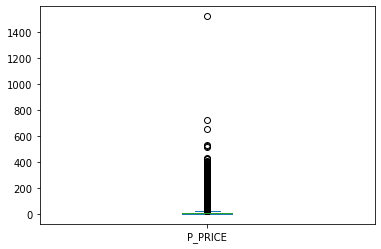

In [32]:
df['P_PRICE'].plot(kind = 'box')

In [33]:
print(np.mean(df['P_PRICE']))
print(np.median(df['P_PRICE']))
print(np.max(df['P_PRICE']) - np.min(df['P_PRICE']))

9.54536733772249
5.17
1521.84


In [34]:
print(np.quantile(df['P_PRICE'],.25))
print(np.quantile(df['P_PRICE'],.75))
print(np.quantile(df['P_PRICE'],.75)-np.quantile(df['P_PRICE'],.25))

2.65
9.93
7.279999999999999


In [35]:
df['CTRY_1'].unique() # 어떤 나라가 있는지 확인

array(['아르헨티나', '바레인', '칠레', '중국', '프랑스', '인도네시아', '일본', '대한민국', '모로코',
       '멕시코', '말레이시아', '노르웨이', '페루', '러시아', '시에라리온', '세네갈', '태국', '튀니지',
       '대만', '미국', '베트남', '남아프리카 공화국', '기니', '인도', '필리핀', '포르투갈',
       '사우디아라비아', '뉴질랜드', '파키스탄', '아랍에미리트', '캐나다', '에콰도르', '아일랜드', '터키',
       '스페인', '아이슬란드', '모리타니', '호주', '바누아투', '영국', '소말리아', '불가리아', '피지',
       '우크라이나', '리비아', '세이셸', '이탈리아', '키리바시', '기니비사우', '브라질', '스리랑카',
       '우루과이', '세인트빈센트 그레나딘', '에스토니아', '이란', '미얀마', '파푸아뉴기니', '가나',
       '방글라데시', '네덜란드', '파나마', '감비아', '크로아티아', '앙골라', '베네수엘라', '싱가포르',
       '포클랜드 제도', '모잠비크', '이집트', '수리남', '루마니아', '몰타', '라트비아', '나미비아',
       '오만', '그리스', '그린란드', '알제리', '니카라과', '쿡 제도', '팔라우', '쿠바', '라이베리아',
       '마다가스카르', '미크로네시아 연방', '사이프러스', '콜롬비아'], dtype=object)

In [36]:
df2000 = df.loc[0:2000]

In [37]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:xlabel='CTRY_1', ylabel='P_PRICE'>

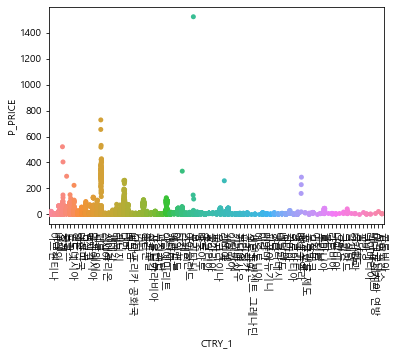

In [38]:
plt.xticks(rotation = - 90 )
plt.rcParams['figure.figsize'] = [20, 5]
sns.stripplot(x = df['CTRY_1'] , y= df['P_PRICE'] ,data = df)

<AxesSubplot:xlabel='CTRY_2', ylabel='P_PRICE'>

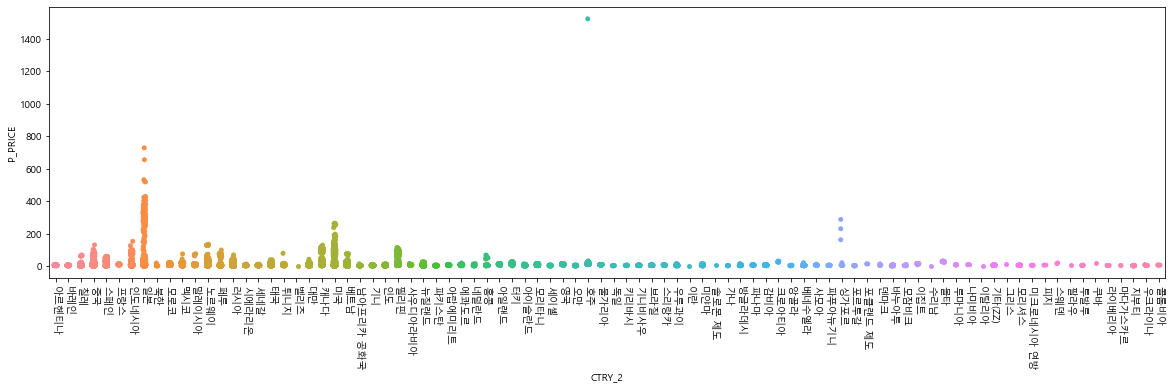

In [39]:
plt.xticks(rotation = - 90 )
sns.stripplot(x = df['CTRY_2'] , y= df['P_PRICE'] ,data = df)

<AxesSubplot:xlabel='P_IMPORT_TYPE', ylabel='P_PRICE'>

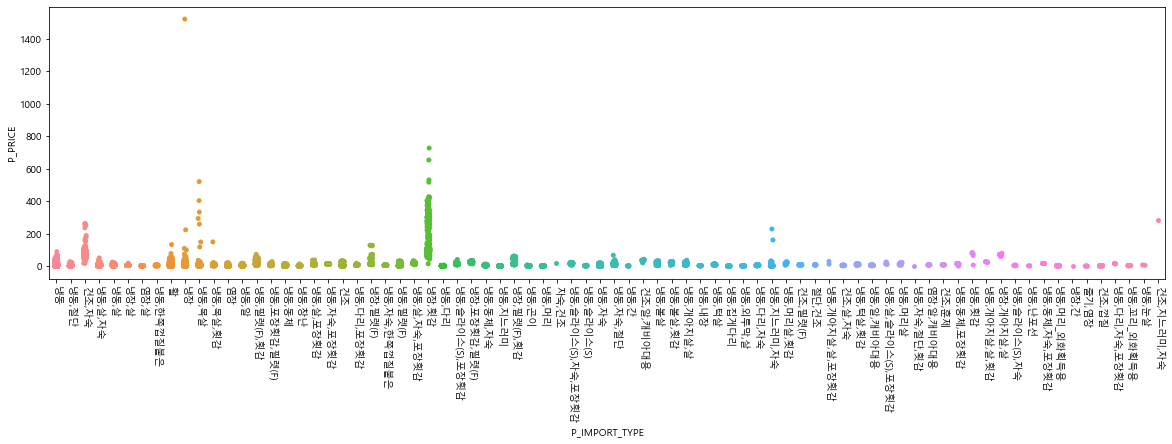

In [40]:
plt.xticks(rotation = - 90 )
sns.stripplot( x = df['P_IMPORT_TYPE'], y = df['P_PRICE'], data = df)

In [41]:
#plt.xticks(rotation = - 90 )
#sns.stripplot(x = df['CTRY_1'] , y= df['P_PRICE'] ,hue = 'P_IMPORT_TYPE', data = df)

In [42]:
df1 = df[(df['P_NAME'] == '연어') | (df['P_NAME'] == '오징어') | (df['P_NAME'] == '흰다리새우')]   # test_set에서 요구하는 것만 분류 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P_IMPORT_TYPE', ylabel='count'>

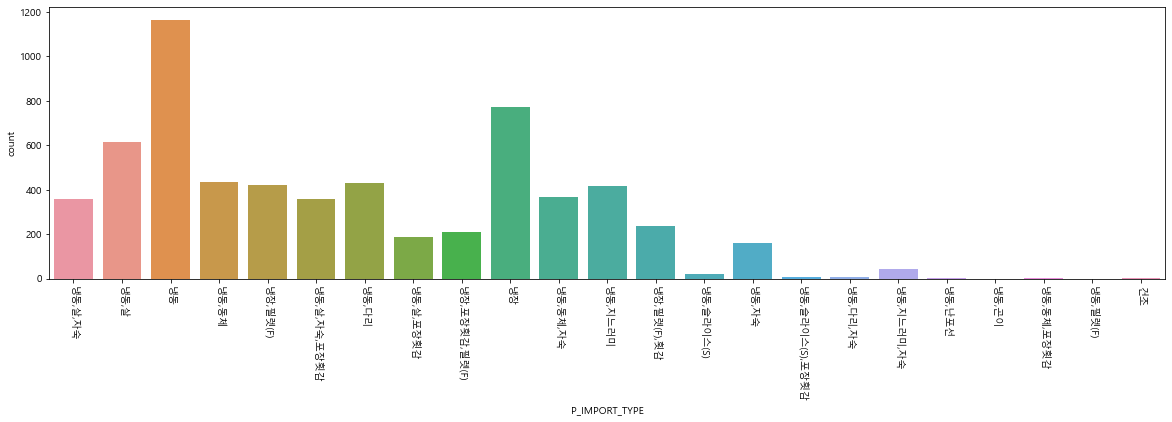

In [43]:
plt.xticks(rotation = -90)
sns.countplot( df1['P_IMPORT_TYPE'], data = df1)

In [44]:
Counter(df1['P_IMPORT_TYPE'])  # 수입형태 확인

Counter({'냉동,살,자숙': 358,
         '냉동,살': 615,
         '냉동': 1164,
         '냉동,동체': 435,
         '냉장,필렛(F)': 420,
         '냉동,살,자숙,포장횟감': 361,
         '냉동,다리': 433,
         '냉동,살,포장횟감': 190,
         '냉장,포장횟감,필렛(F)': 211,
         '냉장': 774,
         '냉동,동체,자숙': 366,
         '냉동,지느러미': 418,
         '냉장,필렛(F),횟감': 236,
         '냉동,슬라이스(S)': 23,
         '냉동,자숙': 163,
         '냉동,슬라이스(S),포장횟감': 7,
         '냉동,다리,자숙': 9,
         '냉동,지느러미,자숙': 46,
         '냉동,난포선': 3,
         '냉동,곤이': 1,
         '냉동,동체,포장횟감': 2,
         '냉동,필렛(F)': 1,
         '건조': 4})

In [45]:
Counter(df1['CTRY_1'] == df1['CTRY_2'])  # 다른게 119개 

Counter({True: 6121, False: 119})

In [46]:
dfn = df1[df1['CTRY_1'] != df1['CTRY_2']]

<AxesSubplot:>

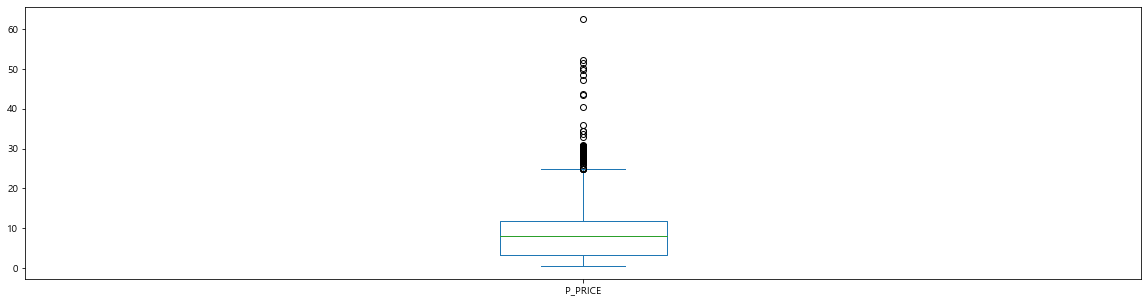

In [47]:
df1['P_PRICE'].plot(kind = 'box') # 이상치는 포함 

<AxesSubplot:>

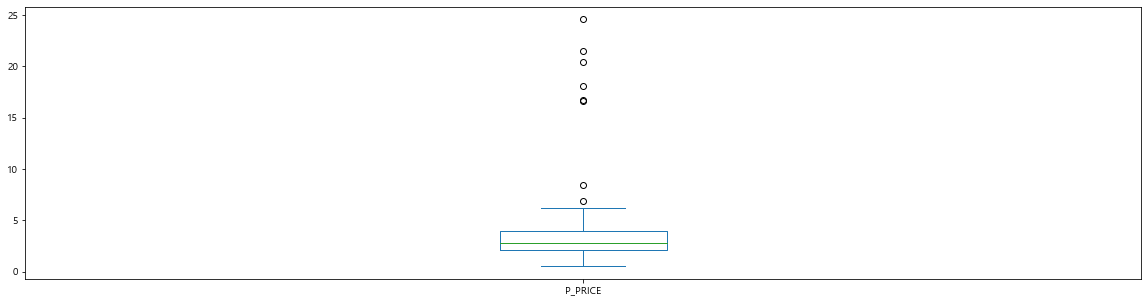

In [48]:
dfn['P_PRICE'].plot(kind = 'box')  # 다른것의 이상치 존재

In [49]:
print(np.mean(df1['P_PRICE']))
print(np.median(df1['P_PRICE']))
print(np.max(df1['P_PRICE']) - np.min(df1['P_PRICE']))
print(np.quantile(df1['P_PRICE'],.25))
print(np.quantile(df1['P_PRICE'],.75))
print(np.quantile(df1['P_PRICE'],.75)-np.quantile(df1['P_PRICE'],.25))

8.758139423076939
8.05
62.06
3.19
11.86
8.67


<AxesSubplot:xlabel='P_NAME', ylabel='P_PRICE'>

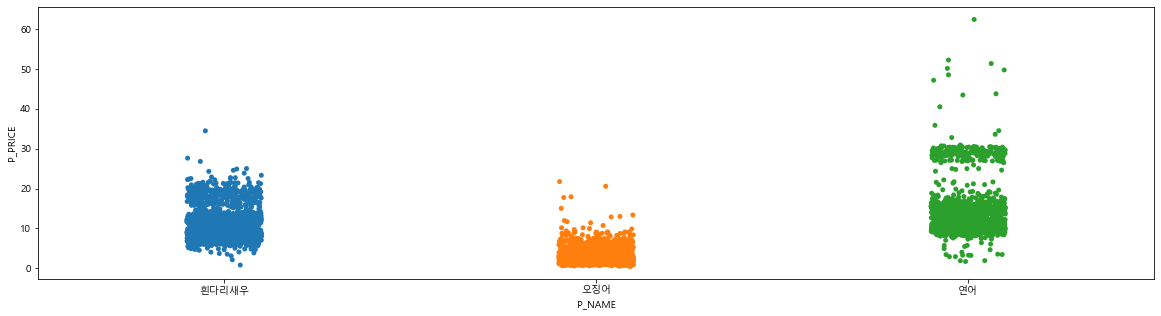

In [50]:
sns.stripplot(x = 'P_NAME', y = 'P_PRICE', data = df1) # 연어는 값이 오른건지 일시적인건지 확인 할 필요가 있음 

<AxesSubplot:xlabel='P_NAME', ylabel='P_PRICE'>

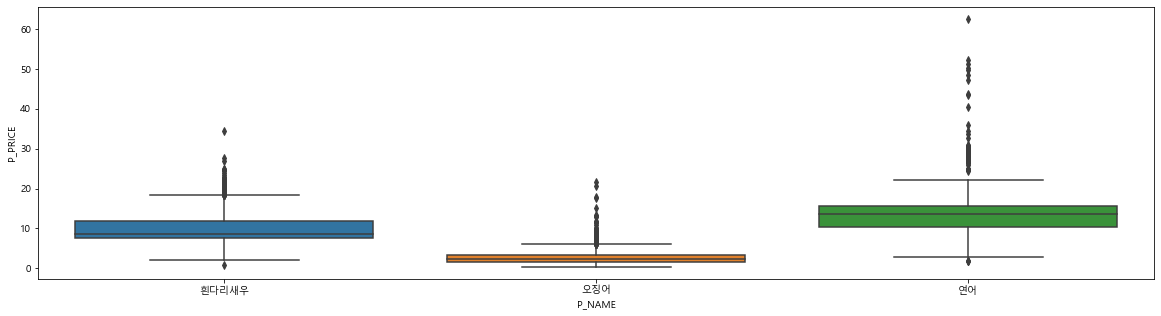

In [51]:
sns.boxplot(x = 'P_NAME', y = 'P_PRICE',data = df1) # 가격 이상치 확인

In [52]:
Counter(dfn['P_NAME'])   # 수입 수출 지역이 다른 곳의 해양생물 종류 

Counter({'오징어': 112, '흰다리새우': 5, '연어': 2})

<AxesSubplot:xlabel='P_NAME', ylabel='P_PRICE'>

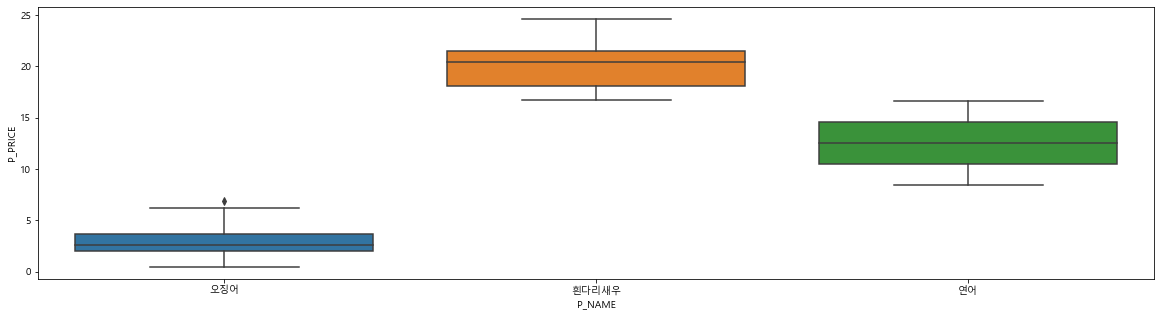

In [53]:
sns.boxplot(x = 'P_NAME', y = 'P_PRICE',data = dfn)  #데이터 제외

In [54]:
np.mean(dfn['P_PRICE'])

3.800756302521008

In [55]:
df2 = df1[df1['CTRY_1'] == df1['CTRY_2']]

<AxesSubplot:xlabel='P_NAME', ylabel='P_PRICE'>

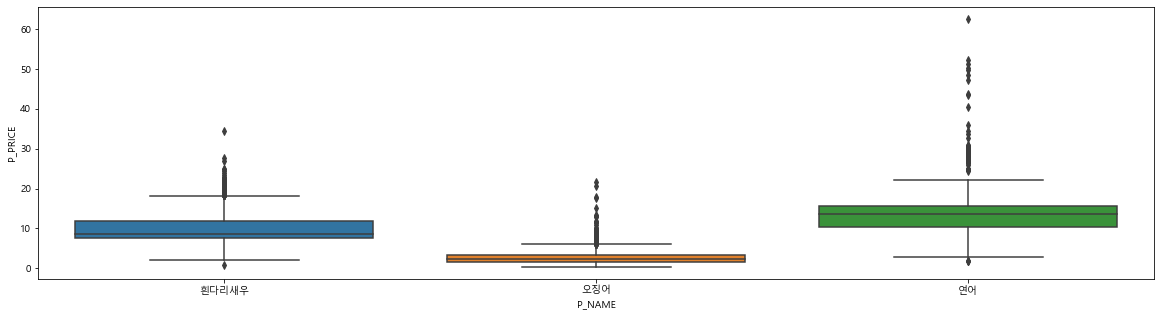

In [56]:
sns.boxplot(x = 'P_NAME', y = 'P_PRICE',data = df2)

<AxesSubplot:xlabel='P_NAME', ylabel='P_PRICE'>

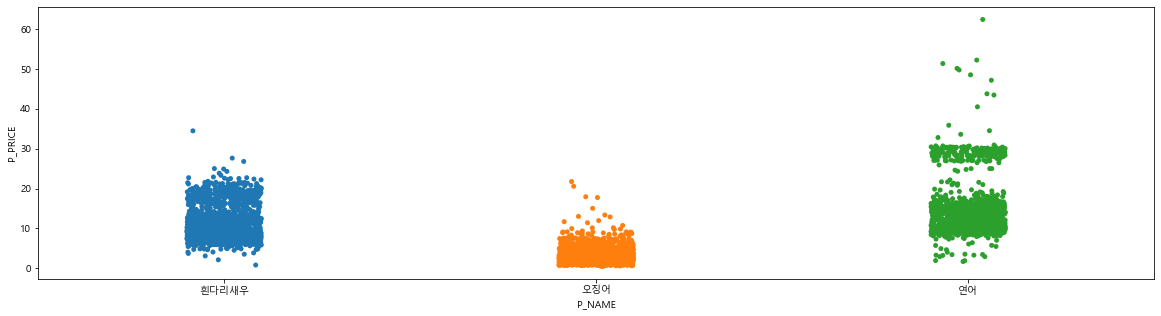

In [57]:
sns.stripplot(x = 'P_NAME', y = 'P_PRICE', data = df2)  # 연어를 나라별로 나눴을 떄 언제 어디서 상승을 값이 상승을 하는지 확인 

In [58]:
dat = df2['REG_DATE'].apply(lambda x : x.split('-'))  # 날짜 데이터 분리

In [59]:
dat = dat.reset_index(drop = True)  # 인데스 원래대로 정리 

In [60]:
# 날씨 데이터 분리 
dat= list(dat)
year = []
for i in dat:
    year.append(i[0])
    
year
month = []
for i in dat:
    month.append(i[1])
month

['12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '02',

In [61]:
# 데이터에 따로 분리한것을 지정 
df2['year'] = year
df2['month'] = month

C:\Users\kio02\AppData\Local\Temp/ipykernel_29764/2919731562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = year
C:\Users\kio02\AppData\Local\Temp/ipykernel_29764/2919731562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = month


In [62]:
df2['날짜'] = df2[['year','month']].apply(lambda x : '/'.join(x),axis = 1) # 2015/12 형태로 만들기 

C:\Users\kio02\AppData\Local\Temp/ipykernel_29764/3035652443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['날짜'] = df2[['year','month']].apply(lambda x : '/'.join(x),axis = 1) # 2015/12 형태로 만들기


In [63]:
df2['날짜'].unique()

array(['2015/12', '2016/01', '2016/02', '2016/03', '2016/04', '2016/05',
       '2016/06', '2016/07', '2016/08', '2016/09', '2016/10', '2016/11',
       '2016/12', '2017/01', '2017/02', '2017/03', '2017/04', '2017/05',
       '2017/06', '2017/07', '2017/08', '2017/09', '2017/10', '2017/11',
       '2017/12', '2018/01', '2018/02', '2018/03', '2018/04', '2018/05',
       '2018/06', '2018/07', '2018/08', '2018/09', '2018/10', '2018/11',
       '2018/12', '2019/01', '2019/02', '2019/03', '2019/04', '2019/05',
       '2019/06', '2019/07', '2019/08', '2019/09', '2019/10', '2019/11',
       '2019/12'], dtype=object)

In [64]:
price_index = pd.read_excel('C:/Users/kio02/OneDrive/Desktop/물가지수.xlsx')  # 한국은행 데이터에서 물가지수를 가져옴

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/kio02/OneDrive/Desktop/물가지수.xlsx'

In [ ]:
price_index = price_index.drop([0,1,2,3,4])

In [ ]:
 price_index.columns = ['날짜','신선','냉동']

In [ ]:
price_index 

In [ ]:
df3 = pd.merge(df2,price_index,on = '날짜')  #날짜로 join

In [ ]:
df3.isnull().sum()

In [ ]:
market_fre = df3.loc[df3['P_IMPORT_TYPE'].str.contains('냉동')] # 냉동인 값만 가져오기 

In [ ]:
market_fre['냉동'] =market_fre['냉동'].apply(lambda x :int(x))  # 정수로 만들기
market_fre['P_PRICE'] = market_fre['P_PRICE'].apply(lambda x : float(x))  # 실수로 만들기 
market_fre['org_price'] = market_fre['P_PRICE']/market_fre['냉동']*100    # 원가 가격을 만들기 위해 값/단가 *100
market_live = df3.loc[df3['P_IMPORT_TYPE'].str.contains('냉동')==False]   # 냉동인 아닌 것만 고르기  
market_live['신선'].apply(lambda x : int(x))    #  정수만들기
market_live['P_PRICE'] = market_live['P_PRICE'].apply(lambda x : float(x))
market_live['신선'] = market_live['신선'].apply(lambda x : int(x))
market_live['org_price'] = market_live['P_PRICE']/market_live['신선']*100
fish_market = pd.concat([market_live,market_fre],axis = 0) # 값 합치기 
fish_market =fish_market.sort_values(by = ['날짜'],axis = 0) # 정렬하기 

In [ ]:
fish_market = fish_market.sort_values(by = ['REG_DATE'],axis = 0)  # 날짜로 정렬하기

In [ ]:
# 물고기별로 나누기
market_salmon = fish_market[fish_market['P_NAME'] == '연어']
market_shrimp= fish_market[fish_market['P_NAME'] == '흰다리새우']
market_squid = fish_market[fish_market['P_NAME'] == '오징어']  

In [ ]:
market_squid['P_NAME'].unique()

In [ ]:
print(np.mean(market_squid['P_PRICE']))   # 오징어 값들 
print(np.median(market_squid['P_PRICE']))
print(np.max(market_squid['P_PRICE']) - np.min(market_squid['P_PRICE']))
print(np.quantile(market_squid['P_PRICE'],.25))
print(np.quantile(market_squid['P_PRICE'],.75))
print(np.quantile(market_squid['P_PRICE'],.75)-np.quantile(market_squid['P_PRICE'],.25))

In [ ]:
print(np.mean(market_shrimp['P_PRICE']))  # 새우 값들
print(np.median(market_shrimp['P_PRICE']))
print(np.max(market_shrimp['P_PRICE']) - np.min(market_shrimp['P_PRICE']))
print(np.quantile(market_shrimp['P_PRICE'],.25))
print(np.quantile(market_shrimp['P_PRICE'],.75))
print(np.quantile(market_shrimp['P_PRICE'],.75)-np.quantile(market_shrimp['P_PRICE'],.25))

In [ ]:
print(np.mean(market_salmon['P_PRICE']))    # 연어 값들 
print(np.median(market_salmon['P_PRICE']))
print(np.max(market_salmon['P_PRICE']) - np.min(market_salmon['P_PRICE']))
print(np.quantile(market_salmon['P_PRICE'],.25))
print(np.quantile(market_salmon['P_PRICE'],.75))
print(np.quantile(market_salmon['P_PRICE'],.75)-np.quantile(market_salmon['P_PRICE'],.25))

In [ ]:
sns.stripplot(x = 'CTRY_1', y = 'P_PRICE',data = market_squid)

In [ ]:
Counter(market_squid['CTRY_1'])

In [ ]:
sns.stripplot(x = 'CTRY_1', y = 'P_PRICE',data = market_shrimp)

In [ ]:
sns.stripplot(x = 'CTRY_1',y = 'P_PRICE',data = market_salmon)   # 노르웨이 영국, 

# anova

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
formula = 'P_PRICE ~ C(CTRY_1) + C(P_IMPORT_TYPE)+ C(REG_DATE) + C(P_PURPOSE) '
lm = ols(formula, df).fit()
print(anova_lm(lm))

In [ ]:
from sklearn import preprocessing

In [ ]:
def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 
for i in fish_market.columns :
  data_encoded[i]=label.fit_transform(fish_market[i])

In [ ]:
data_encoded.head()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
data = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

# 상관분석

In [ ]:
sns.heatmap(data,annot =True)

In [ ]:
import statsmodels.api  as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [ ]:
formula = 'org_price ~CTRY_1 +CTRY_2 + P_PURPOSE + P_NAME + P_IMPORT_TYPE +날짜'
lm = smf.ols(formula,fish_market).fit()
anova_lm(lm)

In [ ]:
market_squid_c = market_squid[market_squid['CTRY_2'] == '중국']
market_squid_p = market_squid[market_squid['CTRY_2'] == '페루']
market_squid_r = market_squid[market_squid['CTRY_2'] == '칠레']

In [ ]:
sns.stripplot(x= market_squid_c['P_IMPORT_TYPE'], y = market_squid_c['P_PRICE'])  # 냉동동체,냉동, 냉동다리 ,내동통제자숙

In [ ]:
sns.stripplot(x= market_squid_p['P_IMPORT_TYPE'], y = market_squid_p['P_PRICE'])

In [ ]:
sns.stripplot(x= market_squid_r['P_IMPORT_TYPE'], y = market_squid_r['P_PRICE'])

In [ ]:
market_squid_c[market_squid_c['P_IMPORT_TYPE'] == '냉동,다리'].isnull().sum()

In [ ]:
market_squid_c[market_squid_c['P_IMPORT_TYPE'] == '냉동,다리']['P_PRICE'].plot()

In [ ]:
market_squid_p[market_squid_p['P_IMPORT_TYPE']=='냉동,동체,자숙']['P_PRICE'].plot()

In [77]:

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

<AxesSubplot:>

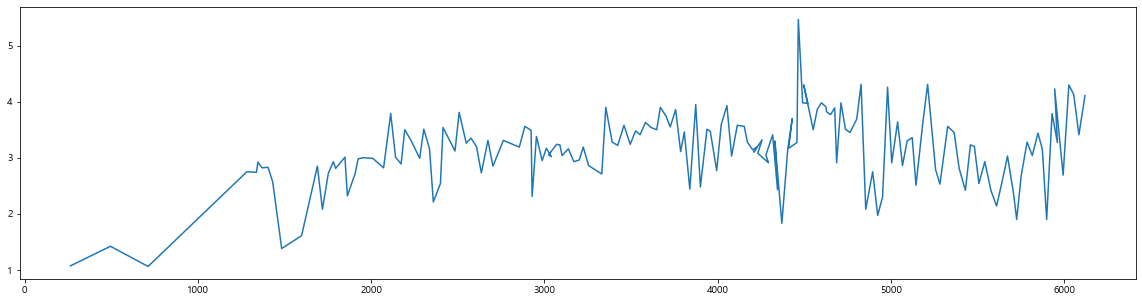

In [78]:
market_squid_c[market_squid_c['P_IMPORT_TYPE'] == '냉동']['P_PRICE'].plot()

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 나라별로 어류 값을 확인하기 

### 연어

In [80]:
market_salmon_n = market_salmon[market_salmon['CTRY_2']== '노르웨이']

<AxesSubplot:xlabel='P_IMPORT_TYPE', ylabel='P_PRICE'>

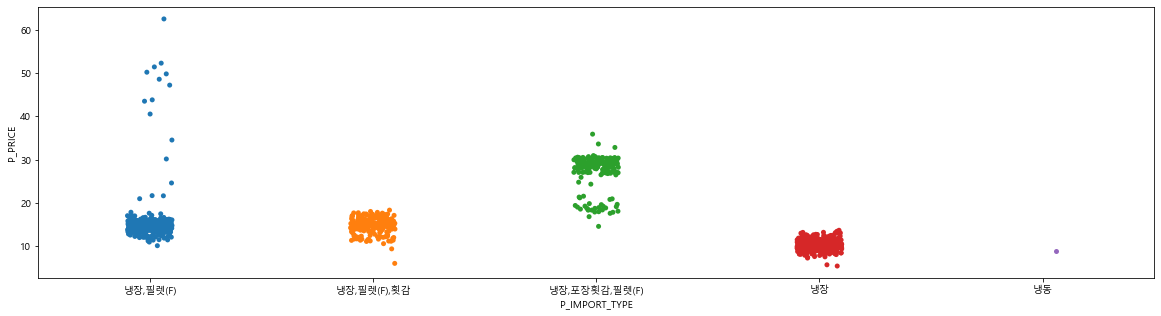

In [81]:
sns.stripplot(x= market_salmon_n['P_IMPORT_TYPE'], y = market_salmon_n['P_PRICE'])

In [82]:
Counter(market_salmon_n[market_salmon_n['P_IMPORT_TYPE'] == '냉장,필렛(F)']['P_PURPOSE'])

Counter({'판매용': 210, '자사제품제조용': 210})

In [83]:
market_salmon_n_1 = market_salmon_n[market_salmon_n['P_IMPORT_TYPE'] == '냉장,필렛(F)']

In [84]:
market_salmon_n_1

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,year,month,날짜,신선,냉동,org_price
6,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.94,2015,12,2015/12,103,93.0,12.563107
24,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.43,2015,12,2015/12,103,93.0,13.038835
52,2016-01-04,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.76,2016,01,2016/01,103,97.0,13.359223
40,2016-01-04,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.74,2016,01,2016/01,103,97.0,12.368932
65,2016-01-11,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",13.88,2016,01,2016/01,103,97.0,13.475728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,2019-12-16,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",21.65,2019,12,2019/12,89,114.0,24.325843
6085,2019-12-23,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.62,2019,12,2019/12,89,114.0,17.550562
6082,2019-12-23,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",16.18,2019,12,2019/12,89,114.0,18.179775
6117,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.63,2019,12,2019/12,89,114.0,17.561798


In [85]:
market_salmon_n2=market_salmon_n_1[market_salmon_n_1['P_PURPOSE'] == '자사제품제조용']
market_salmon_n3 = market_salmon_n_1[market_salmon_n_1['P_PURPOSE'] == '판매용']

In [86]:
market_salmon_n2.index = market_salmon_n2['REG_DATE']
market_salmon_n3.index = market_salmon_n3['REG_DATE']

In [87]:
market_salmon_n2_1 = market_salmon_n2['P_PRICE'].diff()

In [88]:
market_salmon_n2_1=  market_salmon_n2_1.drop('2015-12-28',axis = 0)

<AxesSubplot:xlabel='REG_DATE'>

C:\Users\kio02\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


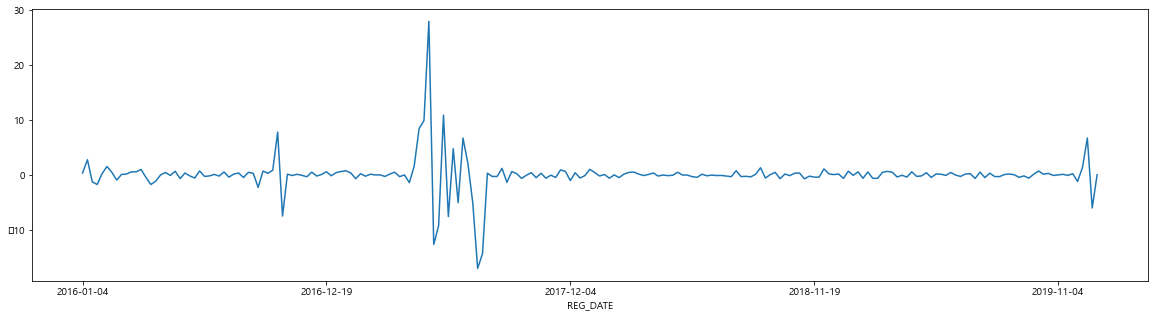

In [89]:
market_salmon_n2_1.plot()

<AxesSubplot:xlabel='REG_DATE'>

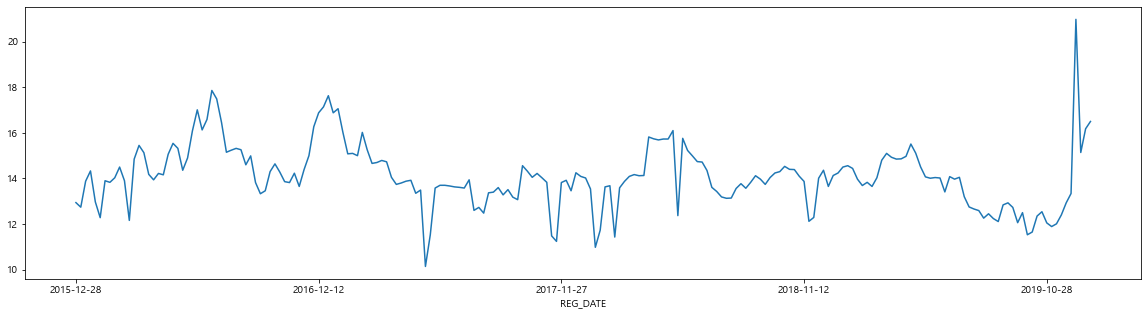

In [90]:
market_salmon_n3['P_PRICE'].plot()

In [91]:
market_squid['CTRY_2'].groupby(market_squid['REG_DATE'])

### 오징어

In [92]:
# 오징어 
market_squid_c #중국
market_squid_p #페루
market_squid_r #칠레
squid_c = market_squid_c.groupby('REG_DATE').mean()   # 중국
squid_r = market_squid_r.groupby('REG_DATE').mean()  # 칠레
squid_p = market_squid_p.groupby('REG_DATE').mean()   # 페루

In [93]:
market_squid_c

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,year,month,날짜,신선,냉동,org_price
8,2015-12-28,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",0.79,2015,12,2015/12,103.0,93,0.849462
62,2016-01-11,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",1.15,2016,01,2016/01,103.0,97,1.185567
84,2016-01-18,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,슬라이스(S)",1.75,2016,01,2016/01,103.0,97,1.804124
89,2016-01-18,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",0.76,2016,01,2016/01,103.0,97,0.783505
139,2016-02-01,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,슬라이스(S),포장횟감",10.15,2016,02,2016/02,105.0,96,10.572917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6084,2019-12-23,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,냉동,3.41,2019,12,2019/12,89.0,114,2.991228
6089,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체,자숙",2.93,2019,12,2019/12,89.0,114,2.570175
6107,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",3.91,2019,12,2019/12,89.0,114,3.429825
6088,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",1.86,2019,12,2019/12,89.0,114,1.631579


In [94]:
np.mean(market_squid_c['P_PRICE']) 

2.8693506493506504

In [95]:
# 흰다리 새우 
market_shrimp
market_shrimp_b = market_shrimp[market_shrimp['CTRY_2'] == '베트남']  # 베트남 
market_shrimp_e = market_shrimp[market_shrimp['CTRY_2'] == '에콰도르']  # 중복 x 
market_shrimp_t = market_shrimp[market_shrimp['CTRY_2'] == '태국']
market_shrimp_chi = market_shrimp[market_shrimp['CTRY_2'] == '중국']
market_shrimp_m = market_shrimp[market_shrimp['CTRY_2']== '말레이시아']
market_shrimp_i =market_shrimp[market_shrimp['CTRY_2'] == '인도']
shrimp_b = market_shrimp_b.groupby('REG_DATE').mean()  # 베트남 
shrimp_t = market_shrimp_t.groupby('REG_DATE').mean() # 태국
shrimp_c = market_shrimp_chi.groupby('REG_DATE').mean()# 중국
shrimp_m = market_shrimp_m.groupby('REG_DATE').mean()  # 말레이시아
shrimp_i = market_shrimp.groupby('REG_DATE').mean()  # 인도
market_shrimp_e[['P_PRICE','org_price']]  # 에콰도르

,P_PRICE,org_price
10,8.28,8.903226
46,8.50,8.762887
74,8.09,8.340206
99,8.15,8.402062
130,8.05,8.298969
...,...,...
5979,6.57,5.763158
6010,6.46,5.666667
6042,6.96,6.105263
6069,6.65,5.833333


In [21]:
#연어 
salmon_n = market_salmon_n.groupby('REG_DATE').mean() # 노르웨이 
market_salmon_b = market_salmon[market_salmon['CTRY_2']== '영국']
salmon_b = market_salmon_b.groupby('REG_DATE').mean()

NameError: name 'market_salmon_n' is not defined

In [22]:
salmon_b

NameError: name 'salmon_b' is not defined

In [23]:
log_squid_c = np.log(squid_c) # 중국
log_squid_r = np.log(squid_r) # 칠레
log_squid_p = np.log(squid_p) # 페루

NameError: name 'squid_c' is not defined

In [99]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF 

C:\Users\kio02\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


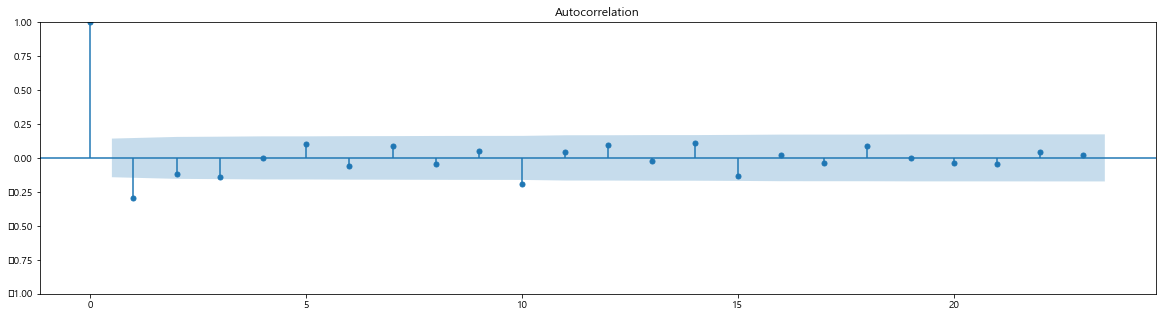

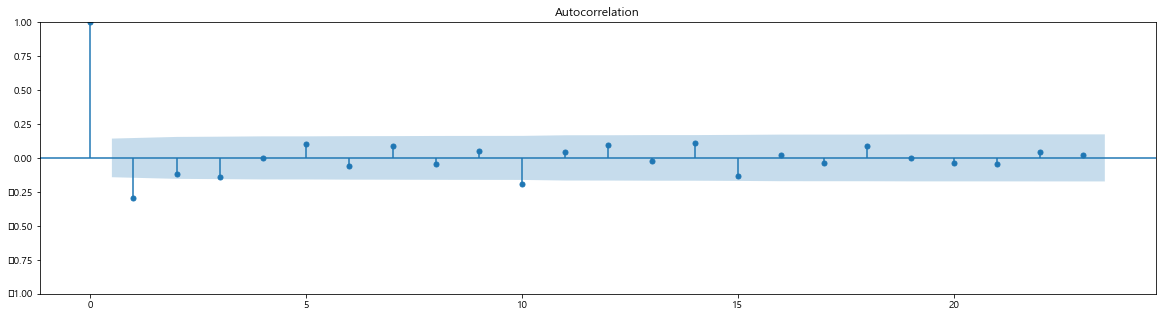

In [100]:
squid_c_diff=log_squid_c['org_price'].diff().dropna()# 오징어 중국

plot_acf(squid_c_diff)

C:\Users\kio02\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


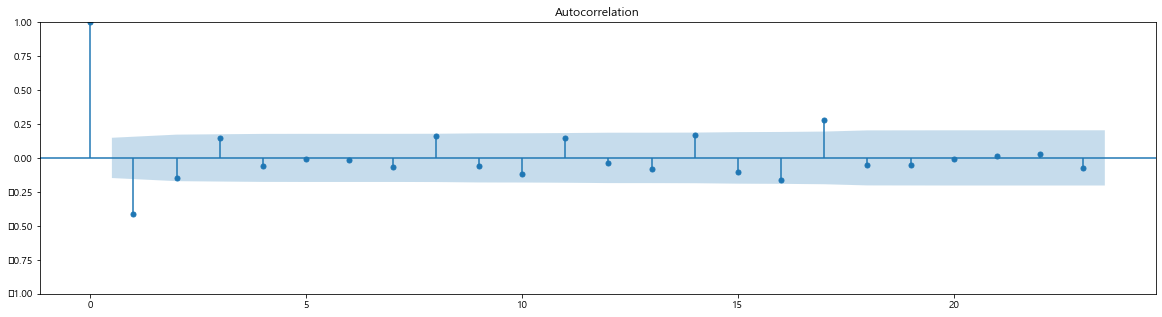

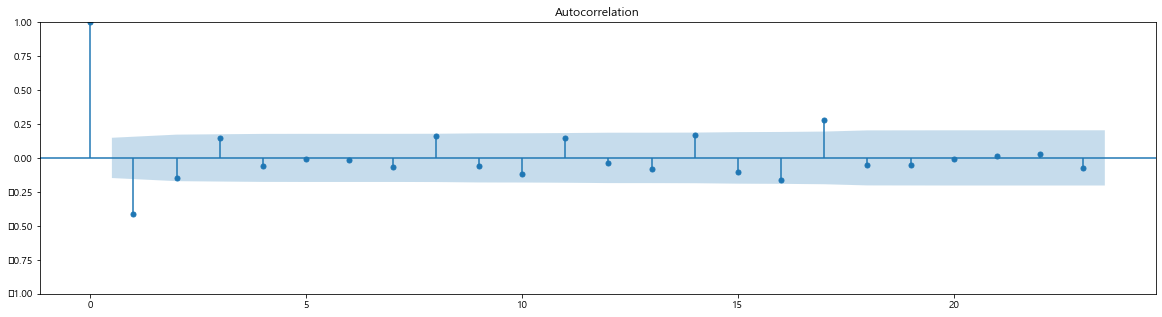

In [101]:
log_squid_r=log_squid_r['org_price'].diff().dropna() # 오징이 칠레
plot_acf(log_squid_r)

C:\Users\kio02\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


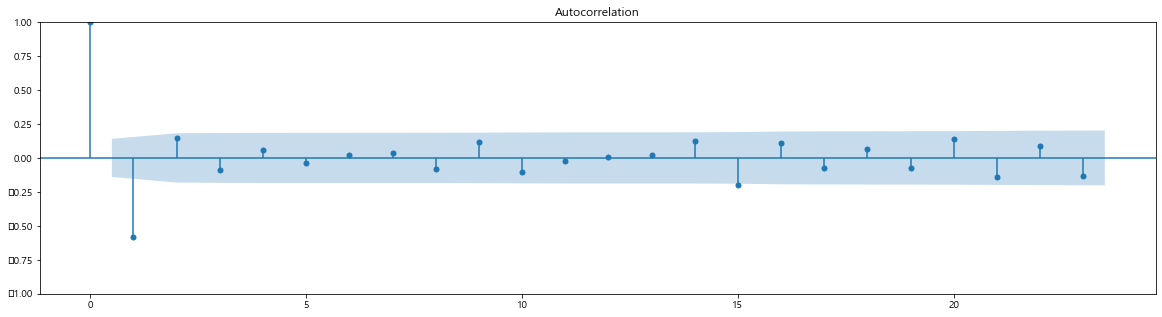

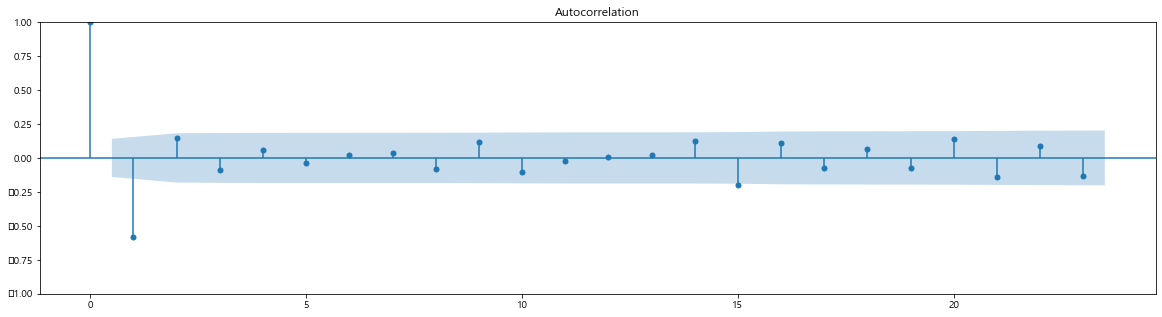

In [102]:
squid_p_diff = log_squid_p['org_price'].diff(1)  # 오징어 페루

squid_p_diff = squid_p_diff.drop(squid_p_diff.index[0])
plot_acf(squid_p_diff)

In [105]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima

# ARIMA

In [106]:
model = ARIMA(squid_p_diff.values,order = (2,0,2))
model_fit = model.fit(trend = 'nc' , full_output = True ,disp = 1)
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [107]:
X =log_squid_r.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

In [108]:
model_arima= auto_arima(train,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-64.871, Time=1.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-109.853, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-108.107, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-107.338, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-85.711, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-108.044, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-107.178, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-105.711, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-102.863, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-107.191, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-105.833, Time=1.50 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-106.420, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-103.546, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-105.920, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-103.996, Time=0.14 sec

Best model:

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [109]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
rmse = np.sqrt(mean_squared_error(test, predictions))


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [110]:
print(rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

NameError: name 'rmse' is not defined

In [111]:
log_shrimp_b = np.log(shrimp_b['org_price'])
log_shrimp_t = np.log(shrimp_t['org_price'])
log_shrimp_c = np.log(shrimp_c['org_price'])
log_shrimp_i = np.log(shrimp_i['org_price'])
log_shrimp_m = np.log(shrimp_m['org_price'])
log_shrimp_e = np.log(market_shrimp_e['org_price'])

In [112]:
shrimp_b_diff = log_shrimp_b.diff().dropna() # 새우 베트남
shrimp_t_diff = log_shrimp_t.diff().dropna() # 새우 태국
shrimp_c_diff = log_shrimp_c.diff().dropna() # 중국
shrimp_i_diff = log_shrimp_i.diff().dropna()  # 인도
shrimp_m_diff = log_shrimp_m.diff().dropna()# 말레이시아
shrimp_e_diff = log_shrimp_e.diff().dropna() # 에콰도르

In [113]:
Y = shrimp_e_diff.values
size = int(len(Y) * 0.7)
train, test = Y[0:size], Y[size:len(Y)]
model_arima= auto_arima(train,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-166.860, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-234.093, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-232.094, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-230.099, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-201.637, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-232.094, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-230.109, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-228.102, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-214.900, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-230.099, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-228.119, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-226.654, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-221.671, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-228.125, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-226.712, Time=0.20 sec

Best mode

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [114]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
rmse = np.sqrt(mean_squared_error(test, predictions))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
print(rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [115]:
salmon_n_diff = np.log(salmon_n['org_price']).diff().dropna() # 노르웨이
salmon_b_diff = np.log(salmon_b['org_price']).diff().dropna() # 영국

<AxesSubplot:xlabel='REG_DATE'>

C:\Users\kio02\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


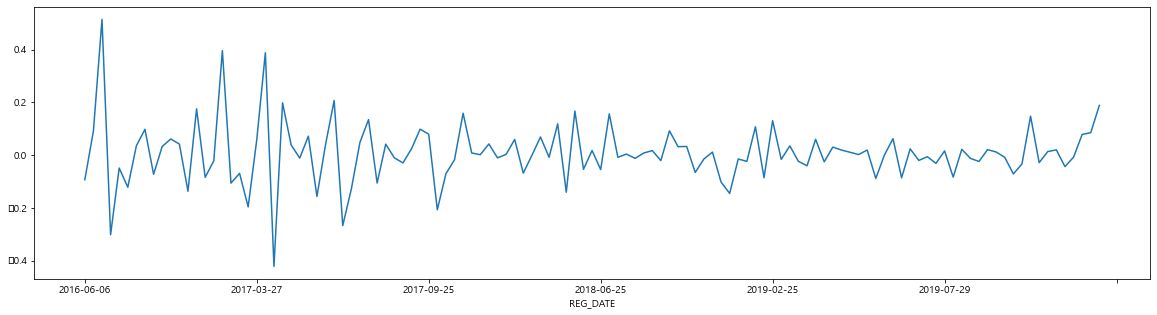

In [116]:
salmon_b_diff.plot()

In [117]:
Z = salmon_n_diff .values
size = int(len(Z) * 0.7)
train, test = Z[0:size], Z[size:len(Z)]
model_arima= auto_arima(train,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-363.002, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-363.915, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-361.925, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-359.968, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-363.829, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-362.790, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-359.939, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-360.159, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-361.916, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-360.626, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-359.956, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-361.652, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,1

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [118]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
rmse = np.sqrt(mean_squared_error(test, predictions))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
print(rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
# liner regression 
# neural network DNN
# support vector
# random forest 
# propet
# lstm
# GBRT gradient boostion regression tree 

In [119]:
# 오징어 
squid_p  # 페루 
squid_r  # 칠레
squid_c # 중국
# 새우 
shrimp_b # 베트남 
shrimp_t  #  태국
shrimp_c   # 중국
shrimp_i # 인도 
shrimp_m # 말레이시아 
market_shrimp_e # 에콰도르 
# 연어 
salmon_n # 노르웨이 
salmon_b  # 영국

,P_PRICE,org_price
REG_DATE,,
2016-05-16,7.75,6.567797
2016-06-06,7.00,5.982906
2016-07-04,7.60,6.551724
2016-07-11,12.71,10.956897
2016-07-18,9.40,8.103448
...,...,...
2019-11-04,8.93,10.383721
2019-11-11,8.86,10.302326
2019-11-18,9.58,11.139535


In [120]:
from sklearn.linear_model import LinearRegression
import time
import pandas as pd

In [121]:
# LSTM

In [122]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
import matplotlib.pyplot as plt

In [123]:
# 오징어 
squid_p  # 페루 
squid_r  # 칠레
squid_c # 중국
# 새우 
shrimp_b # 베트남 
shrimp_t  #  태국
shrimp_c   # 중국
shrimp_i # 인도 
shrimp_m # 말레이시아 
market_shrimp_e # 에콰도르 
# 연어 
salmon_n # 노르웨이 
salmon_b  # 영국

,P_PRICE,org_price
REG_DATE,,
2016-05-16,7.75,6.567797
2016-06-06,7.00,5.982906
2016-07-04,7.60,6.551724
2016-07-11,12.71,10.956897
2016-07-18,9.40,8.103448
...,...,...
2019-11-04,8.93,10.383721
2019-11-11,8.86,10.302326
2019-11-18,9.58,11.139535


In [124]:
#squid_index = pd.to_datetime(squid_c.index)

In [125]:
squid_c1 = squid_c.rename_axis('REG_DATE').reset_index()

In [126]:
squid_c1

,REG_DATE,P_PRICE,org_price
0,2015-12-28,0.790000,0.849462
1,2016-01-11,1.150000,1.185567
2,2016-01-18,1.255000,1.293814
3,2016-02-01,5.163333,5.378472
4,2016-02-15,2.970000,3.093750
...,...,...,...
186,2019-12-02,2.820000,2.473684
187,2019-12-09,3.505000,3.074561
188,2019-12-16,2.885000,2.530702
189,2019-12-23,6.886667,6.040936


In [127]:
squid_c1 = squid_c1.iloc[0:,0:2]

In [128]:
squid_c1

,REG_DATE,P_PRICE
0,2015-12-28,0.790000
1,2016-01-11,1.150000
2,2016-01-18,1.255000
3,2016-02-01,5.163333
4,2016-02-15,2.970000
...,...,...
186,2019-12-02,2.820000
187,2019-12-09,3.505000
188,2019-12-16,2.885000
189,2019-12-23,6.886667


In [129]:
train_size = int(0.85 * len(squid_c1))
test_size = len(squid_c1) - train_size

univariate_df = squid_c1[['REG_DATE', 'P_PRICE']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]


x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

162 29


In [130]:
train = squid_c1.iloc[:-train_size,:]

In [131]:
pd.DataFrame(squid_c1.iloc[:train_size, 0])

,REG_DATE
0,2015-12-28
1,2016-01-11
2,2016-01-18
3,2016-02-01
4,2016-02-15
...,...
157,2019-05-13
158,2019-05-20
159,2019-05-27
160,2019-06-03


In [132]:
#train = train.rename_axis('').reset_index()

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [137]:
train1 = train.copy()

In [138]:
train1.columns = ['ds','y']

In [ ]:
test_size = 20 
x_train = squid_c['P_PRICE'][:-test_size]
x_test = squid_c['P_PRICE'][-test_size:]

In [ ]:
x_train

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [1]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, test, epochs=100, batch_size=1)
# 질문 : 데이터가 200개 밖에 없느데 가능할까 ?

NameError: name 'Sequential' is not defined

In [ ]:
odel.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])